In [1]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="8a889cf2-7b3d-4003-824e-b503f56604b0",
    resource_group_name="rg-jef-ml",
    workspace_name="ml-gpu",
)

In [2]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes
import os

# update the 'my_path' variable to match the location of where you downloaded the data on your
# local filesystem

## create data asset if it doesn't already exist:
data_asset = ml_client.data.get(name="wind_bench_100_128", version=1)
print(
    f"Data asset already exists. Name: {data_asset.path}, version: {data_asset.version}"
)


Data asset already exists. Name: azureml://subscriptions/8a889cf2-7b3d-4003-824e-b503f56604b0/resourcegroups/rg-jef-ml/workspaces/ml-gpu/datastores/workspaceblobstore/paths/UI/2023-12-04_133920_UTC/wind_bench.parquet/, version: 1


In [8]:
x_columns = [
        "Tower top fore-aft acceleration ay [m/s2]",
        "Tower top side-side acceleration ax [m/s2]",
        "Tower mid fore-aft acceleration ay [m/s2]",
        "Tower mid side-side acceleration ax [m/s2]",
        "Tower top rotation x [deg]",
        "Tower top rotation y [deg]",
        "Tower mid rotation x [deg]",
        "Tower mid rotation y [deg]"
]
    
y_columns = [
    "Mudline moment Mx[kNm]",
    "Mudline moment My[kNm]",
    "Mudline moment Mz[kNm]",
    "Waterline moment Mx[kNm]",
    "Waterline moment My[kNm]",
    "Waterline moment Mz[kNm]"
]

wind_columns = [
    "Free wind speed Vx pos    0.00,   0.00,-150.00",
    "Free wind speed Vy pos    0.00,   0.00,-150.00",
    "Free wind speed Vz pos    0.00,   0.00,-150.00"
]



In [9]:
import pandas as pd

df = pd.read_parquet(data_asset.path, columns=wind_columns)
df.head()

,"Free wind speed Vx pos 0.00, 0.00,-150.00","Free wind speed Vy pos 0.00, 0.00,-150.00","Free wind speed Vz pos 0.00, 0.00,-150.00"
Time,,,
0 days 00:00:00.010000,-2.620633,12.525642,1.146131
0 days 00:00:00.060000,-2.619820,12.560104,1.137158
0 days 00:00:00.110000,-2.643632,12.587269,1.160032
0 days 00:00:00.160000,-2.664223,12.610653,1.174411
0 days 00:00:00.210000,-2.681139,12.631664,1.183485


In [7]:
with open("columns.txt", 'w') as f:
    for c in df.columns:
        f.write(f"\"{c}\",\n")

Vx 0.0 -150.0
Vx -78.0 -150.0
Vx 78.0 -150.0
Vx 0.0 -72.0
Vx 0.0 -228.0
Vx 55.0 -205.0
Vx 55.0 -95.0
Vx -55.0 -205.0
Vx -55.0 -95.0


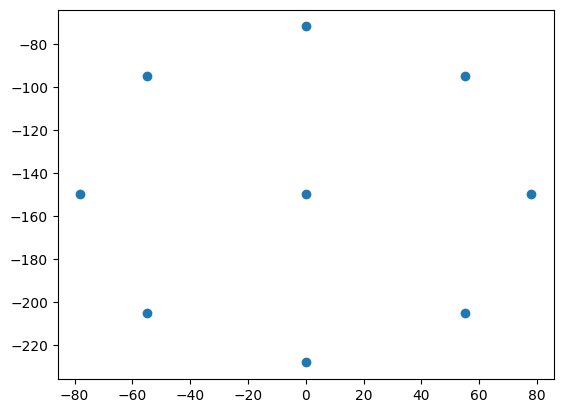

In [27]:
import re
import matplotlib.pyplot as plt

X = []
Z = []
for c in df.columns:
    m = re.match("Free wind speed (V[x|y|z]) pos\\s+([-+]?\\d+.\\d+),\\s*([-+]?\\d+.\d+),\\s*([-+]?\\d+.\\d+)", c)
    if  m and m.group(1) == 'Vx':
        x = float(m.group(2))
        y = float(m.group(4))
        print(m.group(1), x, y)
        X.append(x)
        Z.append(y)

plt.scatter(X, Z)

In [12]:
x_stats = dict(df[x_columns].describe())
for i in range(len(x_columns)):
    print(x_columns[i], x_stats[x_columns[i]]['min'], x_stats[x_columns[i]]['max'])

Tower top fore-aft acceleration ay [m/s2] -0.35009199663999996 0.39217391104
Tower top side-side acceleration ax [m/s2] -0.5286899681999999 0.41830005749999993
Tower mid fore-aft acceleration ay [m/s2] -0.8616105430000001 0.8895380060000001
Tower mid side-side acceleration ax [m/s2] -0.54385269216 0.56713383648
Tower top rotation x [deg] -0.19687499999997726 0.5287500000000023
Tower top rotation y [deg] -0.224914738512 -0.048013503384
Tower mid rotation x [deg] 0.045000000000015916 0.4331250000000182
Tower mid rotation y [deg] -0.075000364832 -0.00550011978


In [11]:
df[y_columns].describe()

,Mudline moment Mx[kNm],Mudline moment My[kNm],Mudline moment Mz[kNm],Waterline moment Mx[kNm],Waterline moment My[kNm],Waterline moment Mz[kNm]
count,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000
mean,66303.954038,7338.135348,-626.049489,146700.024153,18914.916460,-626.046926
std,26975.558005,4674.049556,6683.212692,61883.337431,10821.991611,6676.654143
min,-8743.046824,-8491.565472,-38105.685644,-16593.317216,-8880.563304,-37991.438162
25%,48927.330588,4108.952077,-4608.203689,108681.237703,11469.558578,-4602.974044
50%,67752.833590,6572.670038,-359.870065,149067.356760,17287.678759,-361.536874
75%,86908.622738,9578.781101,3783.586337,194015.013249,24299.767040,3781.904644
max,136384.766550,32878.249170,29324.645220,293800.671846,73725.169680,29234.712690


In [6]:
series = {k: v for k, v in df.groupby('id')}

print(len(series))

100


<Axes: xlabel='Time'>

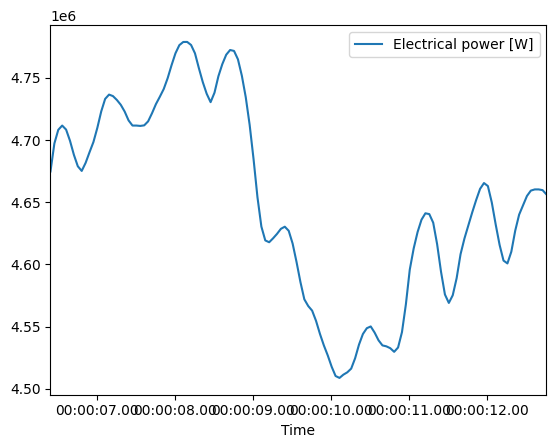

In [7]:
import matplotlib.pyplot as plt

serie = series['Exp1.1']
serie[['Electrical power [W]']].plot()


In [4]:
from azure.ai.ml import command

job = command(
    inputs=dict(
        data=data_asset.path,
        test_train_ratio=0.2,
        learning_rate=0.25
    ),
    code="./src/",  # location of source code
    command="python test.py --data ${{inputs.data}} --test_train_ratio ${{inputs.test_train_ratio}} --learning_rate ${{inputs.learning_rate}}",
    environment="torch_mlflow@latest",
    display_name="test_parquet-8",
    compute=None
)

In [5]:
ml_client.create_or_update(job)

Class AutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class AutoDeleteConditionSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseAutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class IntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class ProtectionLevelSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseIntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Uploading src (0.01 MBs): 100%|███████

Experiment,Name,Type,Status,Details Page
get-started-notebooks,nifty_yuca_7jyl5wyvqp,command,Starting,Link to Azure Machine Learning studio


In [10]:
from azureml.fsspec import AzureMachineLearningFileSystem
import pyarrow.parquet as pq

import pandas as pd

print(data_asset.path)

# instantiate file system using following URI
fs = AzureMachineLearningFileSystem(data_asset.path)

dirs = fs.glob('**/*.parquet') # list folders/files in datastore 'datastorename'

# output example:
# folder1
# folder2
# file3.csv
print(dirs[0])


#table = pq.read_pandas(dirs[0], filesystem=fs)
#print(table)
with fs.open(dirs[0]) as f:
    df = pd.read_parquet(f)
df.head()


azureml://subscriptions/239dc480-600f-413c-ae8c-8a5bbc17ed87/resourcegroups/rg-ml-jef/workspaces/mltry/datastores/workspaceblobstore/paths/LocalUpload/e371ee7f73e78305a4dda0ecbf7ff7c9/wind_bench.parquet/
LocalUpload/e371ee7f73e78305a4dda0ecbf7ff7c9/wind_bench.parquet/id=Exp0.0/2908f0244c774e8786ae9acf46715df3-0.parquet


,Rotor azimuth [deg],Rotor rotational speed [rpm],Blade 1 pitch angle [deg],Blade 2 pitch angle [deg],Blade 3 pitch angle [deg],Generator LSS torque [Nm],Electrical power [W],Bedframe moment [Nm],Generator HSS torque [Nm],Mudline moment Mx[kNm],...,"Free wind speed Vx pos 55.00, 0.00, -95.00","Free wind speed Vy pos 55.00, 0.00, -95.00","Free wind speed Vz pos 55.00, 0.00, -95.00","Free wind speed Vx pos -55.00, 0.00,-205.00","Free wind speed Vy pos -55.00, 0.00,-205.00","Free wind speed Vz pos -55.00, 0.00,-205.00","Free wind speed Vx pos -55.00, 0.00, -95.00","Free wind speed Vy pos -55.00, 0.00, -95.00","Free wind speed Vz pos -55.00, 0.00, -95.00",Water surface elevation [m]
Time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00.010000,66.556067,7.672028,0.520026,0.519916,0.519917,-1.948289e+07,1.510994e+07,0.0,-1.948289e+07,122300.083752,...,-3.559559,8.530156,-0.126334,-2.942660,8.313082,-0.242131,-3.114716,11.832829,0.599726,-0.058321
0 days 00:00:00.060000,68.860026,7.677732,0.528227,0.528132,0.528133,-1.958159e+07,1.519899e+07,0.0,-1.958159e+07,123523.029784,...,-3.587884,8.510981,-0.104801,-2.976881,8.327318,-0.185054,-3.119303,11.840616,0.539415,-0.098596
0 days 00:00:00.110000,71.166235,7.679375,0.536139,0.536058,0.536045,-1.961654e+07,1.523091e+07,0.0,-1.961654e+07,123776.701048,...,-3.625911,8.496323,-0.142878,-2.987754,8.348031,-0.153502,-3.112289,11.845533,0.438913,-0.142723
0 days 00:00:00.160000,73.470194,7.677345,0.543834,0.543752,0.543754,-1.961114e+07,1.522401e+07,0.0,-1.961114e+07,122898.246856,...,-3.632668,8.491040,-0.183655,-3.006875,8.365335,-0.150289,-3.137754,11.833485,0.328324,-0.188766
0 days 00:00:00.210000,75.767403,7.673720,0.551354,0.551258,0.551260,-1.958625e+07,1.519774e+07,0.0,-1.958625e+07,121087.315888,...,-3.616679,8.491636,-0.221247,-3.031143,8.379997,-0.167236,-3.183398,11.810534,0.216735,-0.237811


(442, 10) (442,)
(4, 3, 20)
Coefficient of determination: 0.129578
Coefficient of determination: 0.252084
Coefficient of determination: 0.227912


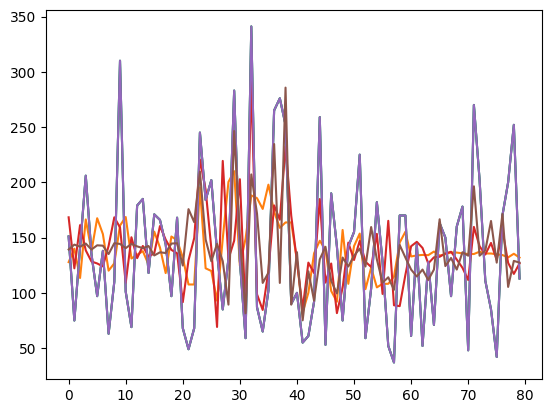

In [13]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape, y.shape)

indices = [0, 2, 3]
n_batches = 4

y_array = np.zeros(shape=(4, 3, 20), dtype=np.float32)
y_hat_array = np.zeros(shape=(4, 3, 20), dtype=np.float32)

for i, idx in enumerate(indices):
    for b in range(n_batches):
        X_train = X[b*20:(b+1)*20, idx:idx+1]
        y_train = y[b*20:(b+1)*20]
        y_array[b, i, :] = y_train

        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(X_train, y_train)

        # Make predictions using the testing set
        y_hat = regr.predict(X_train)
        y_hat_array[b, i, :] = y_hat

        # # The mean squared error
        # print("Mean squared error: %.6f" % mean_squared_error(y_train, y_hat))
        # # The coefficient of determination: 1 is perfect prediction
        # print("Coefficient of determination: %.6f" % r2_score(y_train, y_hat))

print(y_array.shape)


for idx in range(3):
    y_all = y_array[:, idx, :].flatten()
    y_hat_all = y_hat_array[:, idx, :].flatten()
    plt.plot(y_all)
    plt.plot(y_hat_all)
    print("Coefficient of determination: %.6f" % r2_score(y_all, y_hat_all))







In [18]:
import torch
from torchmetrics.regression import R2Score

y_tensor = torch.from_numpy(y_array)
y_hat_tensor = torch.from_numpy(y_hat_array)

r2score = R2Score(num_outputs=3, multioutput='raw_values')

for b in range(n_batches):
    y_transpose =  y_tensor[b, :, :].transpose(0, 1)
    y_hat_transpose =y_hat_tensor[b, :, :].transpose(0, 1)
    
    r2score.update( y_hat_transpose, y_transpose )

print(r2score.compute())



tensor([0.1296, 0.2521, 0.2279])
